code compares output by gender over the given time frame
requires no user inputs

Please choose a form and work type to compare across genders.
1=poetry in journals
2=short stories in journals
3=criticism in journals
4=poetry in anthologies
5=short stories in anthologies
6=criticism in anthologies
7=poetry in collections
8=short stories in collections


Compare :  6


Search for male works complete (767 results)
Search for female works complete (895 results)


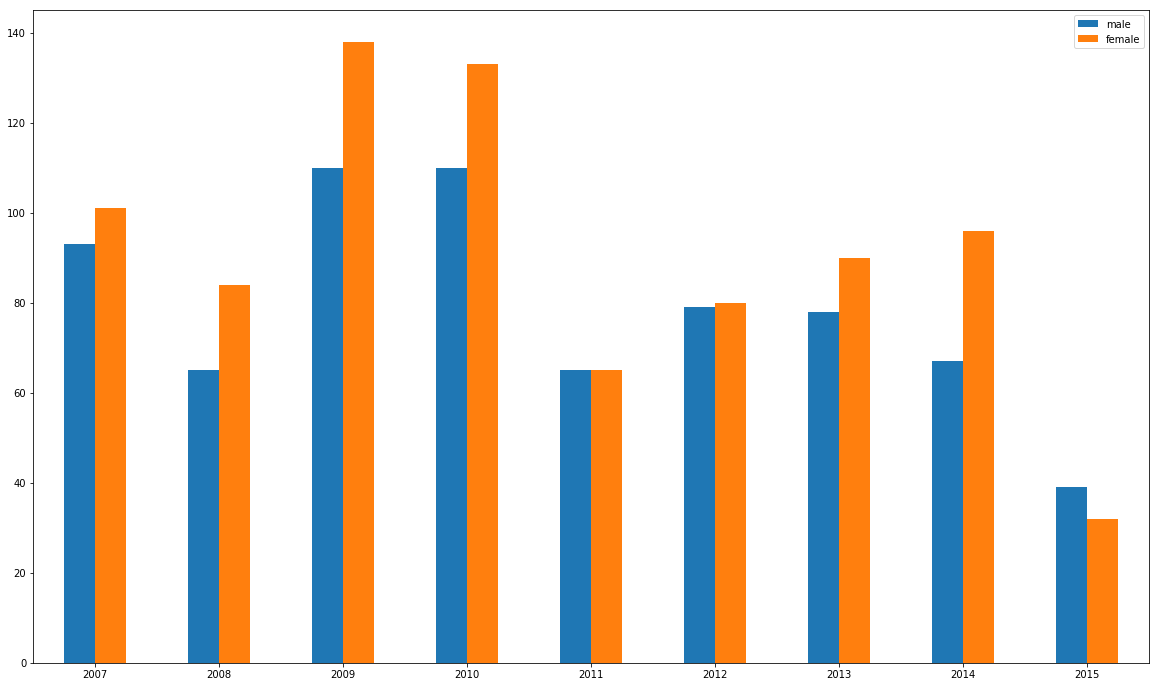

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests 
import ipywidgets as widgets

%matplotlib inline

print("Please choose a form and work type to compare across genders.")
print("1=poetry in journals")
print("2=short stories in journals")
print("3=criticism in journals")
print("4=poetry in anthologies")
print("5=short stories in anthologies")
print("6=criticism in anthologies")
print("7=poetry in collections")
print("8=short stories in collections")
search1 = input("Compare : ")

# default is the same as choosing "1"
form = "poetry"
workType = "single%20work"
extra = "%20AND%20(ftwcworktype:%22periodical%20issue%22)"

if search1 == "2":
    form = "short%20story"
elif search1 == "3":
    form = "criticism"
elif search1 == "4":
    extra = "%20AND%20(ftwcworktype:%22anthology%22)"
elif search1 == "5":
    form = "short%20story"
    extra = "%20AND%20(ftwcworktype:%22anthology%22)"
elif search1 == "6":
    form = "criticism"
    extra = "%20AND%20(ftwcworktype:%22anthology%22)"
elif search1 == "7":
    workType = "selected%20work"
    extra = ""
elif search1 == "8":
    form = "short%20story"
    workType = "selected%20work"
    extra = ""

r = requests.get("https://www.austlit.edu.au/austlit/search?format=IdsOnly&facetValuesSize=0&facetSampleSize=0&passThru=y&count=11250&from=0&agentQuery=(agender:male)&workQuery=(wform:%22" + form + "%22)%20AND%20(wworkType:%22" + workType + "%22)%20AND%20(wdate:[2007%20TO%202016])" + extra + "&scope=work", headers={"accept":"application/json"})
j = r.json()
search1res = pd.DataFrame.from_dict(j)

searchstr1 = "https://www.austlit.edu.au/austlit/export"
r2 = requests.post(searchstr1, data = {"exportTemplate":"JSON","disposition":"file","downloadFileName":"export","downloadFileExtension":"json","nodes":search1res["results"]}, headers={"accept":"application/json"})
j2 = r2.json()
search1res2 = pd.DataFrame.from_dict(j2)
print("Search for male works complete (" + str(len(search1res2.index)) + " results)")

#search2 = input("Compare to: ")
r3 = requests.get("https://www.austlit.edu.au/austlit/search?format=IdsOnly&facetValuesSize=0&facetSampleSize=0&passThru=y&count=11250&from=0&agentQuery=(agender:female)&workQuery=(wform:%22" + form + "%22)%20AND%20(wworkType:%22" + workType + "%22)%20AND%20(wdate:[2007%20TO%202016])" + extra + "&scope=work", headers={"accept":"application/json"})
j3 = r3.json()
search2res = pd.DataFrame.from_dict(j3)

searchstr2 = "https://www.austlit.edu.au/austlit/export"
r4 = requests.post(searchstr1, data = {"exportTemplate":"JSON","disposition":"file","downloadFileName":"export","downloadFileExtension":"json","nodes":search2res["results"]}, headers={"accept":"application/json"})
j4 = r4.json()
search2res2 = pd.DataFrame.from_dict(j4)
print("Search for female works complete (" + str(len(search2res2.index)) + " results)")

minyear = 2007 #int(input("Start year:"))
maxyear = 2016 #int(input("End year:")) + 1

all_years = []
search1yearsD = {}
search2yearsD = {}
failed_dates = 0;
for x in range(minyear, maxyear):
    all_years.append(x)
    search1yearsD[x] = 0
    search2yearsD[x] = 0


for d1 in search1res2["firstKnownDate"]:
    if str(d1).find("-") != -1:
        d1 = str(d1).split("-")[0]
    try:
        if int(d1)in all_years:
            search1yearsD[int(d1)] = search1yearsD[int(d1)] + 1
    except ValueError:
        failed_dates+=1


for d2 in search2res2["firstKnownDate"]:
    if str(d2).find("-") != -1:
        d2 = d2.split("-")[0]
    try:
        if int(d2)in all_years:
            search2yearsD[int(d2)] = search2yearsD[int(d2)] + 1
    except ValueError:
        failed_dates+=1

if failed_dates > 0:
    print(str(failed_dates) + " failures to parse publishing year.")
        
search1years = []
search2years = []
for x in range(minyear, maxyear):
    search1years.append(search1yearsD[x])
    search2years.append(search2yearsD[x])
    
df = pd.DataFrame({"male": search1years, "female": search2years}, index=all_years)
ax = df.plot.bar(rot=0,figsize=(20, 12))
